# TASK 4 SALES PREDICTION USING PYTHON

Author:- Md Nadim

Batch: January-2025

Domain: Data Science

In [86]:
from IPython.display import display, HTML

# Center the image using HTML and CSS
display(HTML("""
    <div style="display: flex; justify-content: center;">
        <img src='C:/Users/Nadim/Downloads/WhatsApp Image 2025-01-29 at 11.34.11_7b2c61f0.jpg' width="300">
    </div>
"""))



In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("Downloads/advertising.csv")

In [5]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [6]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# Aim:-
Sales prediction involves estimating the number of products customers will buy by analyzing factors like advertising spend, target audience, and advertising platforms used. By accurately predicting sales, businesses can optimize marketing efforts, forecast demand, and improve resource allocation. This helps in making informed decisions, enhancing operational efficiency, and ultimately driving profitability.

In [8]:
df.shape

(200, 4)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [11]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# Basic Observation

Sales and Advertising Spend Insights

Advertising Spend Analysis:

The average expense spent on TV is the highest among all advertising platforms, indicating that businesses allocate more resources to TV campaigns.
The average expense spent on Radio is the lowest, suggesting that businesses may prioritize other platforms over radio for their advertising efforts.

Sales Performance:

The maximum sale recorded is 27, showing the highest number of products sold during the observed period.
The minimum sale is 1.6, representing the lowest number of products sold in a given period.

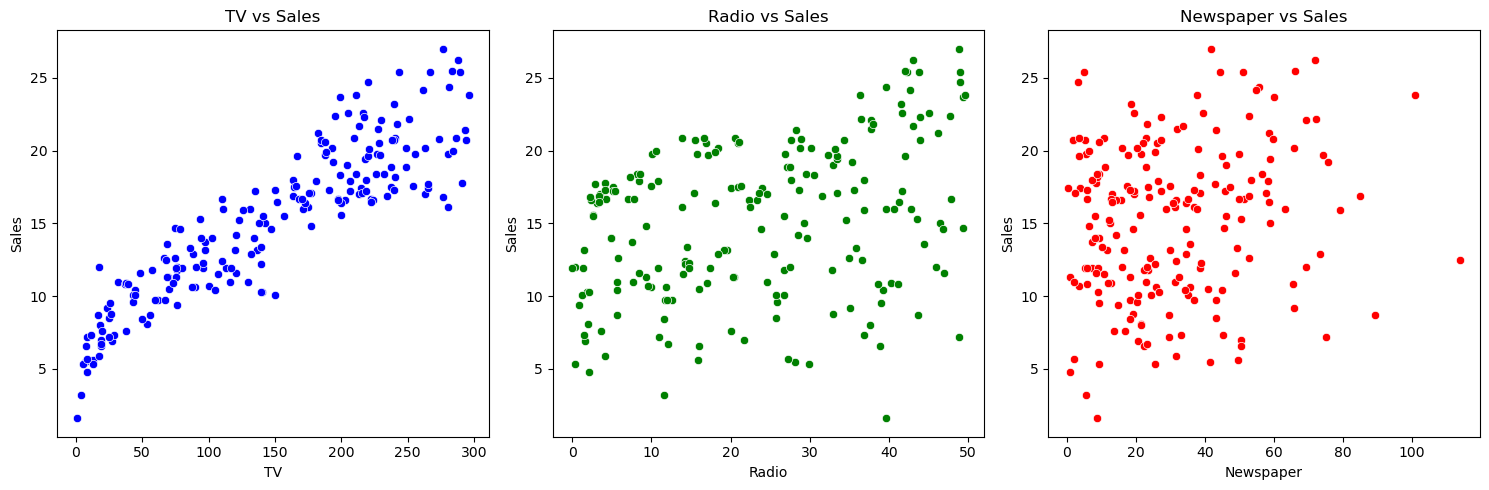

In [14]:
# Plotting individual scatter plots
plt.figure(figsize=(15, 5))

# TV vs Sales
plt.subplot(1, 3, 1)
sns.scatterplot(x='TV', y='Sales', data=df, color='blue')
plt.title('TV vs Sales')

# Radio vs Sales
plt.subplot(1, 3, 2)
sns.scatterplot(x='Radio', y='Sales', data=df, color='green')
plt.title('Radio vs Sales')

# Newspaper vs Sales
plt.subplot(1, 3, 3)
sns.scatterplot(x='Newspaper', y='Sales', data=df, color='red')
plt.title('Newspaper vs Sales')

plt.tight_layout()
plt.show()


# Pair Plot Observation

When advertising cost increases in TV Ads the sales will increase as well. While the for newspaper and radio it is bit unpredictable.

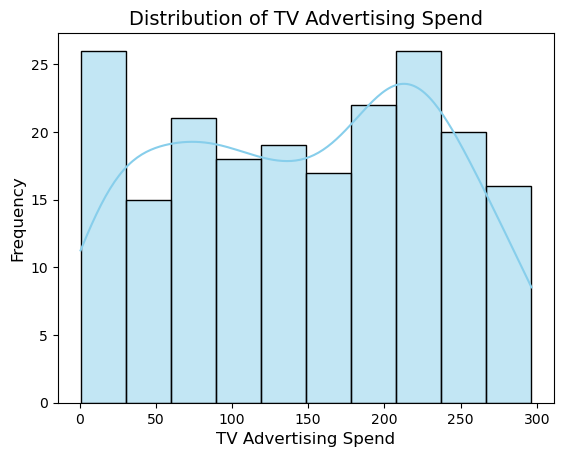

In [66]:
# Plotting the histogram using seaborn
sns.histplot(df['TV'], bins=10, kde=True, color='skyblue')

# Adding title and labels for better visualization
plt.title('Distribution of TV Advertising Spend', fontsize=14)
plt.xlabel('TV Advertising Spend', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.show()


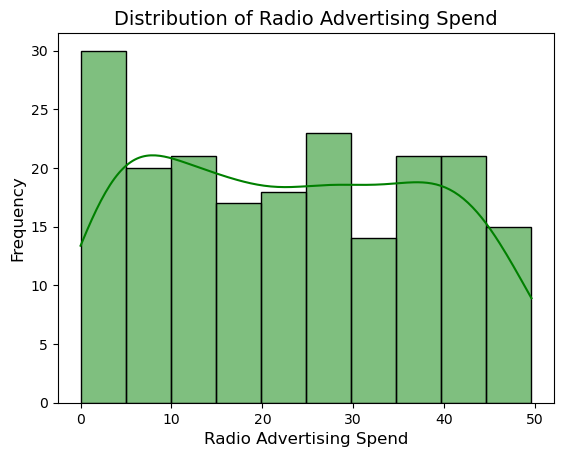

In [68]:
# Plotting the histogram using seaborn
sns.histplot(df['Radio'], bins=10, kde=True, color='green')

# Adding title and labels for better visualization
plt.title('Distribution of Radio Advertising Spend', fontsize=14)
plt.xlabel('Radio Advertising Spend', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.show()


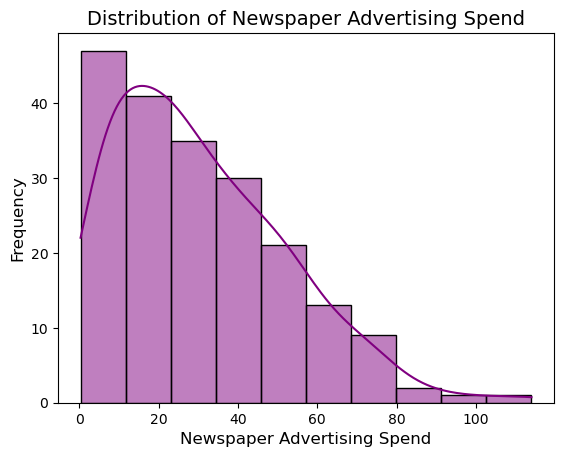

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the histogram using seaborn
sns.histplot(df['Newspaper'], bins=10, kde=True, color='purple')

# Adding title and labels for better visualization
plt.title('Distribution of Newspaper Advertising Spend', fontsize=14)
plt.xlabel('Newspaper Advertising Spend', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.show()


# Histogram Observation

The majority sales is the result of low advertising cost in newspaper

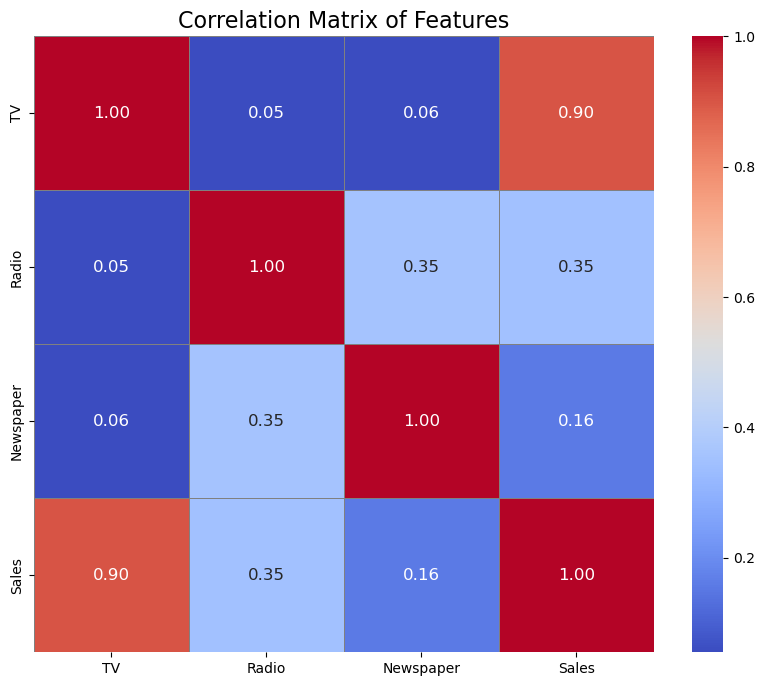

In [72]:
# Create a heatmap of the correlation matrix with customized color palette
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='gray', annot_kws={'size': 12})

# Adding a title for the heatmap
plt.title('Correlation Matrix of Features', fontsize=16)

plt.show()


#  SALES IS HIGHLY COORELATED WITH THE TV

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['TV']], df[['Sales']], test_size = 0.3,random_state=0)

In [26]:
print(X_train)

        TV
131  265.2
96   197.6
181  218.5
19   147.3
153  171.3
..     ...
67   139.3
192   17.2
117   76.4
47   239.9
172   19.6

[140 rows x 1 columns]


In [27]:
print(y_train)

     Sales
131   17.7
96    16.7
181   17.2
19    14.6
153   16.0
..     ...
67    13.4
192    5.9
117    9.4
47    23.2
172    7.6

[140 rows x 1 columns]


In [28]:
print(X_test)

        TV
18    69.2
170   50.0
107   90.4
98   289.7
177  170.2
182   56.2
5      8.7
146  240.1
12    23.8
152  197.6
61   261.3
125   87.2
180  156.6
154  187.8
80    76.4
7    120.2
33   265.6
130    0.7
37    74.7
74   213.4
183  287.6
145  140.3
45   175.1
159  131.7
60    53.5
123  123.1
179  165.6
185  205.0
122  224.0
44    25.1
16    67.8
55   198.9
150  280.7
111  241.7
22    13.2
189   18.7
129   59.6
4    180.8
83    68.4
106   25.0
134   36.9
66    31.5
26   142.9
113  209.6
168  215.4
63   102.7
8      8.6
75    16.9
118  125.7
143  104.6
71   109.8
124  229.5
184  253.8
97   184.9
149   44.7
24    62.3
30   292.9
160  172.5
40   202.5
56     7.3


In [29]:
print(y_test)

     Sales
18    11.3
170    8.4
107   12.0
98    25.4
177   16.7
182    8.7
5      7.2
146   18.2
12     9.2
152   16.6
61    24.2
125   10.6
180   15.5
154   20.6
80    11.8
7     13.2
33    17.4
130    1.6
37    14.7
74    17.0
183   26.2
145   10.3
45    16.1
159   12.9
60     8.1
123   15.2
179   17.6
185   22.6
122   16.6
44     8.5
16    12.5
55    23.7
150   16.1
111   21.8
22     5.6
189    6.7
129    9.7
4     17.9
83    13.6
106    7.2
134   10.8
66    11.0
26    15.0
113   20.9
168   17.1
63    14.0
8      4.8
75     8.7
118   15.9
143   10.4
71    12.4
124   19.7
184   17.6
97    20.5
149   10.1
24     9.7
30    21.4
160   16.4
40    16.6
56     5.5


In [30]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [31]:
res= model.predict(X_test)
print(res)

[[10.93127621]
 [ 9.88042193]
 [12.09159447]
 [22.99968079]
 [16.45920756]
 [10.21976029]
 [ 7.6199906 ]
 [20.28497391]
 [ 8.4464437 ]
 [17.95886418]
 [21.44529217]
 [11.91645209]
 [15.71485245]
 [17.42249065]
 [11.32534656]
 [13.72260788]
 [21.68063975]
 [ 7.18213465]
 [11.23230217]
 [18.82362968]
 [22.88474361]
 [14.82272095]
 [16.72739433]
 [14.35202581]
 [10.07198391]
 [13.88133066]
 [16.20744039]
 [18.36388094]
 [19.40378881]
 [ 8.51759529]
 [10.85465142]
 [18.03001578]
 [22.50709285]
 [20.3725451 ]
 [ 7.86628457]
 [ 8.16731053]
 [10.40584907]
 [17.03936669]
 [10.88749061]
 [ 8.51212209]
 [ 9.16343282]
 [ 8.86788005]
 [14.96502414]
 [18.61564811]
 [18.93309367]
 [12.76479799]
 [ 7.6145174 ]
 [ 8.06879294]
 [14.02363385]
 [12.86878878]
 [13.15339515]
 [19.70481478]
 [21.03480222]
 [17.26376787]
 [ 9.59034237]
 [10.55362545]
 [23.17482317]
 [16.58509115]
 [18.22705095]
 [ 7.54336581]]


In [32]:
model.coef_

array([[0.05473199]])

In [33]:
model.intercept_

array([7.14382225])

In [34]:
0.05473199* 69.2 + 7.14382225

10.931275958

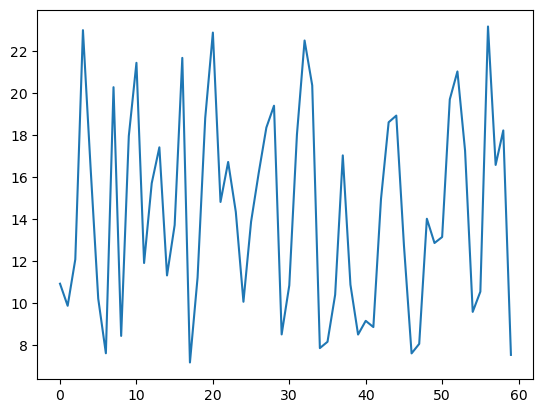

In [35]:
plt.plot(res)

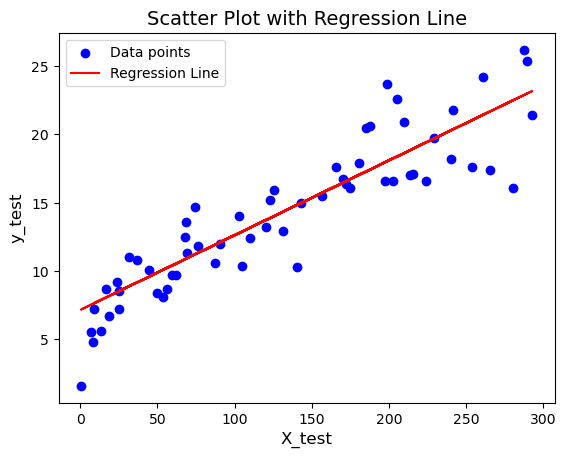

In [74]:
import matplotlib.pyplot as plt

# Scatter plot of X_test vs y_test
plt.scatter(X_test, y_test, color='blue', label='Data points')

# Plot the regression line (calculated using the given formula)
plt.plot(X_test, 7.14382225 + 0.05473199 * X_test, color='red', label='Regression Line')

# Adding labels and title for clarity
plt.title('Scatter Plot with Regression Line', fontsize=14)
plt.xlabel('X_test', fontsize=12)
plt.ylabel('y_test', fontsize=12)

# Display the legend
plt.legend()

# Show the plot
plt.show()


# Conclusion:

The above-mentioned solutions successfully leverage advertising platform datasets to predict sales performance. By utilizing various techniques like scatter plots, regression analysis, and correlation heatmaps, the relationship between advertising spends on TV, Radio, and Newspaper and the resulting sales has been effectively visualized. Additionally, the model's ability to predict sales accurately demonstrates its practical application in understanding how advertising platforms influence consumer purchasing behavior. These insights can now assist businesses in optimizing their advertising strategies for better resource allocation and improved sales forecasting.

# Thank You